In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables
Base.classes.keys()


C:\Users\Aram\AppData\Local\Temp\ipykernel_16616\2191859164.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


['measurement', 'station']

In [7]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [8]:
# Save references to each table
classes = Base.classes

# Assign each table class to a variable for easier reference
Measurement = classes.measurement
Station = classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

station_count = session.query(func.count(Station.id)).scalar()
print(f"There are {station_count} stations in the database.")

There are 9 stations in the database.


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Output the result
if most_recent_date:
    print(f"The most recent date in the dataset is {most_recent_date[0]}")
else:
    print("No dates found in the dataset.")

The most recent date in the dataset is 2017-08-23


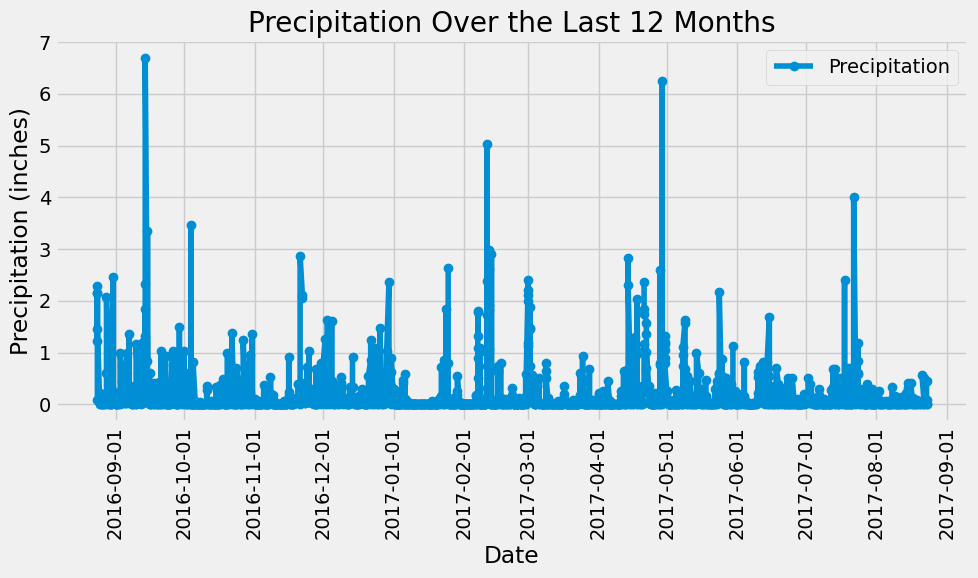

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Precipitation'], label='Precipitation', marker='o', linestyle='-')  # Added markers for clarity
plt.title('Precipitation Over the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')

ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to be at the start of each month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Adjust to show full date

plt.xticks(rotation=90)

plt.legend()
plt.tight_layout()
plt.show()


In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_stats = df['Precipitation'].describe()

print(precipitation_stats)

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number of stations in the dataset

total_stations = session.query(func.count(Station.id)).scalar()

print(f"Total number of stations: {total_stations}")

Total number of stations: 9


In [31]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(
    Measurement.station, 
    func.count(Measurement.station)
).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

print("Station ID - Count of Data Entries")
for station, count in most_active_stations:
    print(f"{station} - {count}")

Station ID - Count of Data Entries
USC00519281 - 2772
USC00519397 - 2724
USC00513117 - 2709
USC00519523 - 2669
USC00516128 - 2612
USC00514830 - 2202
USC00511918 - 1979
USC00517948 - 1372
USC00518838 - 511


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = 'USC00519281'  # Replace this with the actual ID if different

temperature_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station_id).one()

lowest_temp, highest_temp, average_temp = temperature_stats

# Print
print(f"Lowest Temperature for station {most_active_station_id}: {lowest_temp}°F")
print(f"Highest Temperature for station {most_active_station_id}: {highest_temp}°F")
print(f"Average Temperature for station {most_active_station_id}: {average_temp:.2f}°F")



Lowest Temperature for station USC00519281: 54.0°F
Highest Temperature for station USC00519281: 85.0°F
Average Temperature for station USC00519281: 71.66°F


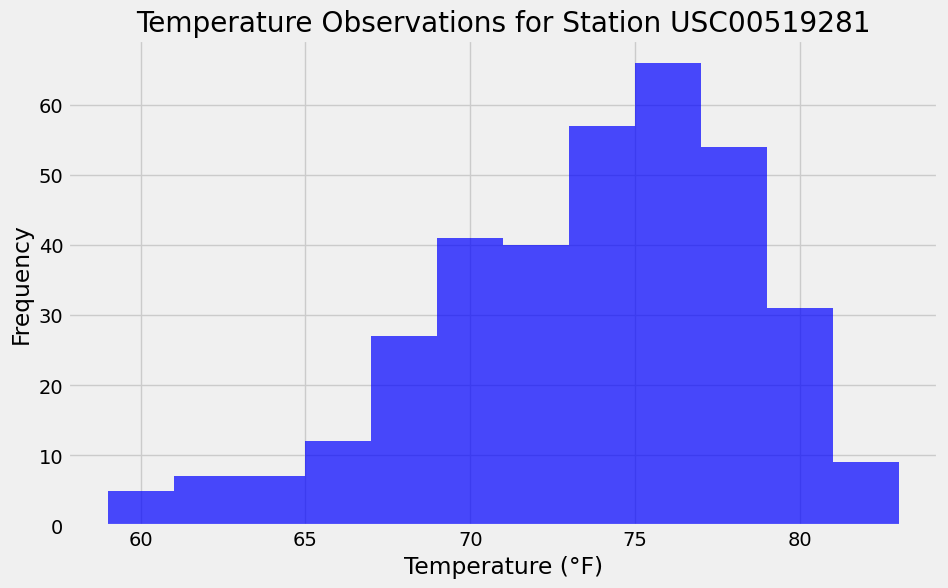

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_recent_date = session.query(func.max(Measurement.date)).\
                   filter(Measurement.station == most_active_station_id).scalar()


most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')

one_year_before = most_recent_date - dt.timedelta(days=365)


results = session.query(Measurement.tobs).\
          filter(Measurement.station == most_active_station_id).\
          filter(Measurement.date >= one_year_before).all()


temperatures = pd.DataFrame(results, columns=['tobs'])

plt.figure(figsize=(10, 6))
plt.hist(temperatures['tobs'], bins=12, color='blue', alpha=0.7)
plt.title(f'Temperature Observations for Station {most_active_station_id}')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Close Session

In [16]:
# Close Session
session.close()